In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("../data/data_jobs.csv")

In [24]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [25]:
df["job_country"].value_counts().head(5)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

In [26]:
df_us = df[df["job_country"] == "United States"].copy()

In [27]:
df_us["job_posted_month"] = df_us["job_posted_date"].dt.month_name()

In [42]:
df_us_pvt = df_us.pivot_table(values="salary_year_avg", index="job_posted_month", columns="job_title_short", aggfunc="count")
# df_us_pvt = df_us.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="count")

In [43]:
df_us_pvt.reset_index(inplace=True)

In [44]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_us_pvt["month_no"] = df_us_pvt["job_posted_month"].map(month_order)

In [45]:
df_us_pvt = df_us_pvt.sort_values(by="month_no",ascending=True).set_index(keys="job_posted_month").drop(columns=["month_no"])

In [46]:
titles = df_us["job_title_short"].value_counts().sort_values(ascending=False).head(3).index.to_list()
titles

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [47]:
# df_us_pvt_top = 
df_us_pvt

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,23,0,456,236,486,14,119,85,150,7
February,23,3,341,308,382,13,77,112,110,12
March,27,1,370,348,428,10,72,126,132,16
April,35,1,357,238,338,14,89,87,90,14
May,20,1,338,257,381,10,81,105,100,6
June,27,2,443,316,441,11,118,125,136,15
July,36,4,414,226,510,13,83,79,126,23
August,56,3,438,279,465,11,88,86,146,15
September,55,3,261,190,315,8,50,74,65,7


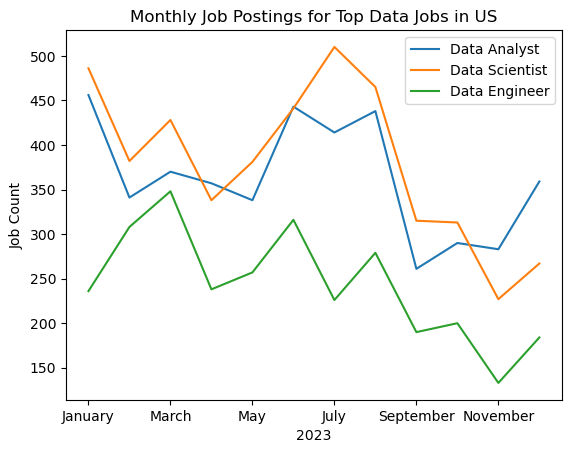

In [51]:
df_us_pvt[titles].plot()
plt.title("Monthly Job Postings for Top Data Jobs in US")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.legend()
plt.show()